In [221]:
path= r"D:\Asus\Documents\retail_clean (1).csv"

In [222]:
import pandas as pd

In [223]:
retail= pd.read_csv(path,index_col='Unnamed: 0')

In [224]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [225]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779495 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779495 non-null  int64  
 1   StockCode    779495 non-null  object 
 2   Description  779495 non-null  object 
 3   Quantity     779495 non-null  int64  
 4   InvoiceDate  779495 non-null  object 
 5   Price        779495 non-null  float64
 6   Customer ID  779495 non-null  float64
 7   Country      779495 non-null  object 
 8   Revenue      779495 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 59.5+ MB


In [226]:
dates=retail['InvoiceDate'].str.split(' ', expand= True)

In [227]:
dates[0]

0          2009-12-01
1          2009-12-01
2          2009-12-01
3          2009-12-01
4          2009-12-01
              ...    
1067366    2011-12-09
1067367    2011-12-09
1067368    2011-12-09
1067369    2011-12-09
1067370    2011-12-09
Name: 0, Length: 779495, dtype: object

In [228]:
retail['InvDate']= pd.to_datetime(dates[0])

In [229]:
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Invoice,779495.0,537427.005391,26901.961110,489434.0,514483.00,536754.00,562002.00,581587.0
Quantity,779495.0,13.507085,146.540284,1.0,2.00,6.00,12.00,80995.0
Price,779495.0,3.218199,29.674823,0.0,1.25,1.95,3.75,10953.5
Customer ID,779495.0,15320.262918,1695.722988,12346.0,13971.00,15246.00,16794.00,18287.0
Revenue,779495.0,22.289821,227.416962,0.0,4.95,12.48,19.80,168469.6


In [230]:
retail['Daysof Week']=pd.to_datetime(retail['InvDate']).dt.dayofweek

In [231]:
retail['Daysof Week'].value_counts()

3    156012
1    134028
2    130782
6    130141
0    124957
4    103175
5       400
Name: Daysof Week, dtype: int64

In [232]:
import seaborn as sns

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daysof Week', ylabel='count'>

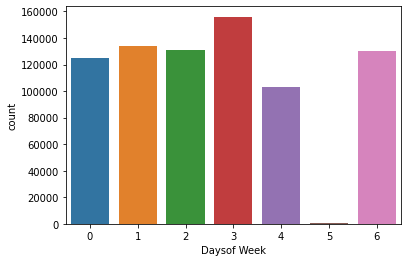

In [233]:
sns.countplot(retail['Daysof Week'])

In [234]:
# retail['Inv Date']= pd.to_datetime(retail['InvoiceDate']).dt.strftime('%Y-%M-%D')

In [235]:
grouped_retail=retail.groupby(['Description','InvDate']).agg(totes_sales=('Quantity','sum')).reset_index()

In [236]:
grouped_retail

,Description,InvDate,totes_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,5
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,2
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [237]:
cv_data= grouped_retail.groupby('Description').agg(average=('totes_sales','mean'), sd= ('totes_sales', 'std')).reset_index()

In [238]:
cv_data

,Description,average,sd
0,DOORMAT UNION JACK GUNS AND ROSES,6.958333,7.865606
1,3 STRIPEY MICE FELTCRAFT,11.220339,14.247889
2,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123
3,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112
4,ANIMAL STICKERS,32.083333,11.758620
...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,36.522388,46.825017
5279,ZINC TOP 2 DOOR WOODEN SHELF,5.902439,7.598700
5280,ZINC WILLIE WINKIE CANDLE STICK,21.116438,23.437864
5281,ZINC WIRE KITCHEN ORGANISER,2.500000,2.505549


In [239]:
grouped_retail

,Description,InvDate,totes_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,5
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,2
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [240]:
cv_data['coeff_var_sq']= (cv_data['sd']/cv_data['average'])**2

In [241]:
cv_data

,Description,average,sd,coeff_var_sq
0,DOORMAT UNION JACK GUNS AND ROSES,6.958333,7.865606,1.277774
1,3 STRIPEY MICE FELTCRAFT,11.220339,14.247889,1.612460
2,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,2.171124
3,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,3.121036
4,ANIMAL STICKERS,32.083333,11.758620,0.134324
...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,36.522388,46.825017,1.643757
5279,ZINC TOP 2 DOOR WOODEN SHELF,5.902439,7.598700,1.657355
5280,ZINC WILLIE WINKIE CANDLE STICK,21.116438,23.437864,1.231955
5281,ZINC WIRE KITCHEN ORGANISER,2.500000,2.505549,1.004444


In [242]:
prod_bydate=retail.groupby(['Description','InvDate']).agg(totes_sales=('Description','count')).reset_index()

In [243]:
skus= prod_bydate['Description'].unique()

In [268]:
len(skus)

5283

In [246]:
prod_bydate

,Description,InvDate,totes_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [257]:
prod_bydate.drop(columns='Prev date', axis= 1 , inplace= True)

In [258]:
prod_bydate

,Description,InvDate,totes_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [266]:
empty_datafram= pd.DataFrame()


In [299]:
a1 = prod_bydate[prod_bydate['Description']== skus[6]]
a1['Prev Date']= a1['InvDate'].shift(1)

<ipython-input-299-54f26330e684>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['Prev Date']= a1['InvDate'].shift(1)


In [300]:
a1

,Description,InvDate,totes_sales,Prev Date
208,BROWN PIRATE TREASURE CHEST,2009-12-01,1,NaT
209,BROWN PIRATE TREASURE CHEST,2009-12-13,2,2009-12-01
210,BROWN PIRATE TREASURE CHEST,2009-12-16,1,2009-12-13
211,BROWN PIRATE TREASURE CHEST,2010-01-10,1,2009-12-16
212,BROWN PIRATE TREASURE CHEST,2010-01-14,1,2010-01-10
213,BROWN PIRATE TREASURE CHEST,2010-01-21,1,2010-01-14


In [270]:
for sku in skus:
    a = prod_bydate[prod_bydate['Description']== sku]
    a['Prev Date']= a['InvDate'].shift(1)
    empty_datafram=pd.concat([empty_datafram,a], axis= 0,)
    

<ipython-input-270-db619a5961ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Prev Date']= a['InvDate'].shift(1)


In [271]:
empty_datafram

,Description,InvDate,totes_sales,Prev Date
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1,NaT
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3,2010-01-05
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1,2010-01-08
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2,2010-01-10
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1,2010-01-11
...,...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2,2011-10-27
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1,2011-11-18
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1,2011-11-23
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1,2011-11-24


In [272]:
empty_datafram.isna().sum()

Description       0
InvDate           0
totes_sales       0
Prev Date      5283
dtype: int64

In [274]:
empty_datafram['Duration']= empty_datafram['InvDate']-empty_datafram['Prev Date']

In [276]:
empty_datafram['Duration'].dtypes

dtype('<m8[ns]')

In [279]:
empty_datafram['Duration']=empty_datafram['Duration'].astype('string')

In [281]:
empty_datafram['Duration']=empty_datafram['Duration'].str.split(" ", expand= True)[0]

In [294]:
empty_datafram['Duration']=pd.to_numeric( empty_datafram['Duration'], errors= 'coerce')

In [295]:
empty_datafram['Duration'].dtypes

dtype('float64')

In [296]:
empty_datafram.shape

(440446, 5)

In [325]:
(empty_datafram.groupby('Description').mean()).reset_index()

,Description,totes_sales,Duration
0,DOORMAT UNION JACK GUNS AND ROSES,2.125000,3.695652
1,3 STRIPEY MICE FELTCRAFT,1.949153,3.741379
2,4 PURPLE FLOCK DINNER CANDLES,1.181818,10.511628
3,50'S CHRISTMAS GIFT BAG LARGE,1.816667,1.847458
4,ANIMAL STICKERS,1.000000,8.272727
...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,1.776119,1.736842
5279,ZINC TOP 2 DOOR WOODEN SHELF,1.170732,17.550000
5280,ZINC WILLIE WINKIE CANDLE STICK,1.551370,2.536082
5281,ZINC WIRE KITCHEN ORGANISER,1.200000,24.333333


In [328]:
cv_data['ADI']= ((empty_datafram.groupby('Description').mean()).reset_index())['Duration']

In [329]:
cv_data

,Description,average,sd,coeff_var_sq,ADI,Categories
0,DOORMAT UNION JACK GUNS AND ROSES,6.958333,7.865606,1.277774,3.695652,0
1,3 STRIPEY MICE FELTCRAFT,11.220339,14.247889,1.612460,3.741379,0
2,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,2.171124,10.511628,0
3,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,3.121036,1.847458,erratic
4,ANIMAL STICKERS,32.083333,11.758620,0.134324,8.272727,intermittent
...,...,...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,36.522388,46.825017,1.643757,1.736842,erratic
5279,ZINC TOP 2 DOOR WOODEN SHELF,5.902439,7.598700,1.657355,17.550000,erratic
5280,ZINC WILLIE WINKIE CANDLE STICK,21.116438,23.437864,1.231955,2.536082,0
5281,ZINC WIRE KITCHEN ORGANISER,2.500000,2.505549,1.004444,24.333333,0


In [342]:
def categories(cv_data):
    a=0
    if ((cv_data['ADI']<1.34) & (cv_data['coeff_var_sq']<0.49)):
        a='smooth'
    if ((cv_data['ADI']>1.34) & (cv_data['coeff_var_sq']>0.49)):
        a='lumpy'
    if ((cv_data['ADI']<1.34) & (cv_data['coeff_var_sq']>0.49)):
        a='erratic'
        
    if ((cv_data['ADI']>1.34) & (cv_data['coeff_var_sq']<0.49)):
        a='intermittent'
        
    return a

In [343]:
cv_data['Categories']=cv_data.apply(categories, axis =1)

In [344]:
(cv_data['ADI']==0).sum()

0

In [345]:
cv_data['Categories']

0              lumpy
1              lumpy
2              lumpy
3              lumpy
4       intermittent
            ...     
5278           lumpy
5279           lumpy
5280           lumpy
5281           lumpy
5282           lumpy
Name: Categories, Length: 5283, dtype: object

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coeff_var_sq', ylabel='ADI'>

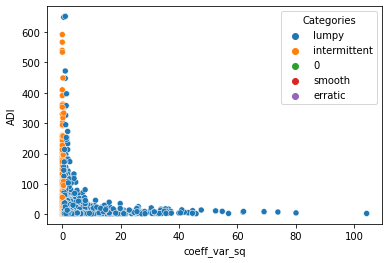

In [350]:

sns.scatterplot(cv_data['coeff_var_sq'], cv_data['ADI'], hue= cv_data['Categories'])

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Categories', ylabel='count'>

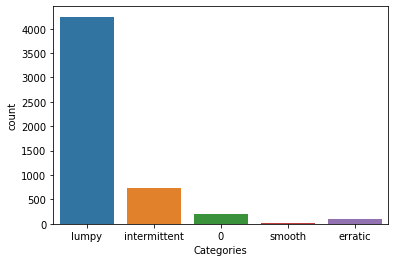

In [351]:
sns.countplot(cv_data['Categories'])